# 8. Higher order derivatives

In [1]:
import numpy as np
from numpy import linspace, zeros, pi

from sympy.core.containers import Tuple
from sympy import symbols
from sympy import Symbol
from sympy import Lambda
from sympy import Function

from gelato.glt import glt_symbol
from gelato.calculus   import (Dot, Cross, Grad, Curl, Rot, Div, dx)
from gelato.calculus   import Constant
from gelato.fem.assembly import assemble_matrix
from gelato.fem.utils    import compile_kernel
from gelato.fem.utils    import compile_symbol

from spl.fem.splines import SplineSpace
from spl.fem.tensor  import TensorSpace
from spl.fem.vector  import VectorFemSpace

In [2]:
x = Symbol('x')

u = Symbol('u')
v = Symbol('v')

a = Lambda((x,v,u), dx(dx(u)) * dx(dx(v)) + u*v)

In [3]:
# ...  create a finite element space
p  = 3
ne = 64

grid = linspace(0., 1., ne+1)

V = SplineSpace(p, grid=grid, nderiv=2)
# ...

In [4]:
kernel_b = compile_kernel('kernel_b', a, V, backend='fortran')

In [5]:
M = assemble_matrix(V, kernel_b).tocsr()
M = M.todense()

In [6]:
# import eigenvalue solver
from scipy.linalg import eig

w, v = eig(M)
wr = w.real
wr.sort()

In [7]:
expr = glt_symbol(a, space=V)

In [8]:
symbol_b = compile_symbol('symbol_b', a, V, backend='fortran')

In [9]:
t1 = linspace(-pi,pi, ne+1)
x1 = linspace(0.,1., ne+1)
e = zeros(ne+1)
symbol_b(x1, t1, e)
e.sort()

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

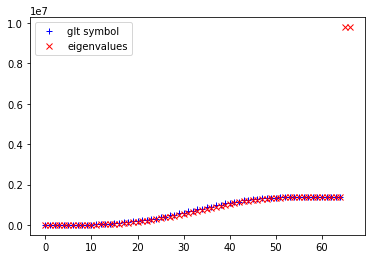

In [11]:
plt.plot(e, "+b", label="glt symbol")
plt.plot(wr, "xr", label="eigenvalues")
plt.legend(loc=2);

In [12]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()